### Perform The following Statistical Tests to Understand the Impact of CEO Program on Recidivism
- Z Test
- Chi-sq

### NULL Hypothesis
The CEO program does not impact the number of people from being convicted within 1-3 years after the program completion.

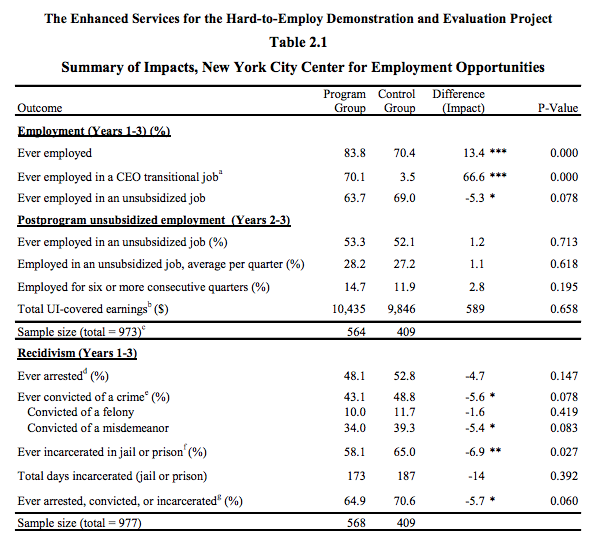
source: https://www.mdrc.org/sites/default/files/What%20Strategies%20Work%20for%20the%20Hard%20FR.pdf
___

In [2]:
import numpy as np

In [3]:
# Test and Control Group Stats of Felony Conviction within 1-3 years of CEO program
# 1 - Test Group; 0 - Control Group
# n_1: sample size of test group
# n_0: sample size of control group
# p_1: percentage of being convicted in test group
# p_0: percentage of being convicted in control group

n_1 = 568
n_0 = 409

p_1 = 0.1
p_0 = 0.117

## Z Test

In [4]:
p = lambda p0, p1, n0, n1: (p0 * n0 + p1 * n1) / (n0 + n1)
se = lambda p, n0, n1: np.sqrt(p * (1 - p) * (1.0 / n0 + 1.0 / n1))
zscore = lambda p0, p1, s : (p0 - p1) / s

print(p(p_0, p_1, n_0, n_1))
print(se(p(p_0, p_1, n_0, n_1), n_0, n_1))
print("Z-Sore: %.3f" % zscore(p_1, p_0, se(p(p_0, p_1, n_0, n_1), n_0, n_1)))


0.107116683726
0.0200556791612
Z-Sore: -0.848


## Observation

Based on the Z-Score Table, Z = -0.848 translate to p = 0.7995 (92.1% confidence). Therefore, given a confidence requirement of 95%, we are not confident enough to reject the NULL hypothesis.

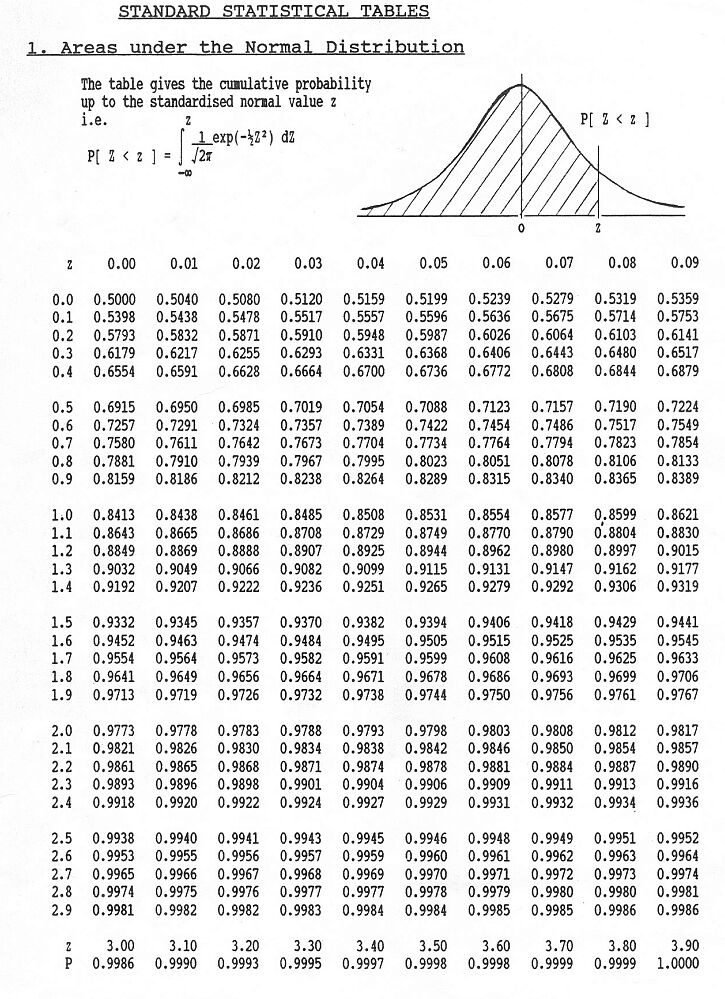

## Chi Square Test


| Convicted a Falony within 1-3 Years of CEO | Yes | No | Total |
| ------------------ | ---- | ------- |
|**Test Group** |57|511|568|
|**Control Group**| 48|361|409|
|**Total**|105|872|**977**|

In [5]:
def evalChisq(stats):
    stats = np.array(stats)
    Expect = np.empty_like(stats)
    for j in range(len(stats[0])):
        for i in range(2):
            
            Expect[i][j] = ((stats[i,:].sum() * stats[:,j].sum()) / 
                        (stats).sum())
    return ((stats - Expect)**2 / Expect).sum()

In [6]:
print("Chi Sq Score: %.8f" % (evalChisq(np.array([[57.0, 511.0], [48.0, 361.0]]))))

Chi Sq Score: 0.71701988


## Observation

Chi score = 0.717 is lower than 3.84, which is the minimum threshold if DOF = 1 and alpha = 0.05. (see frist row, second column from the)

Therefore, the NULL Hypothesis cannot be rejected. The CEO program does not have statistical significant impact on preventing people from being convicted falony after 1-3 years.

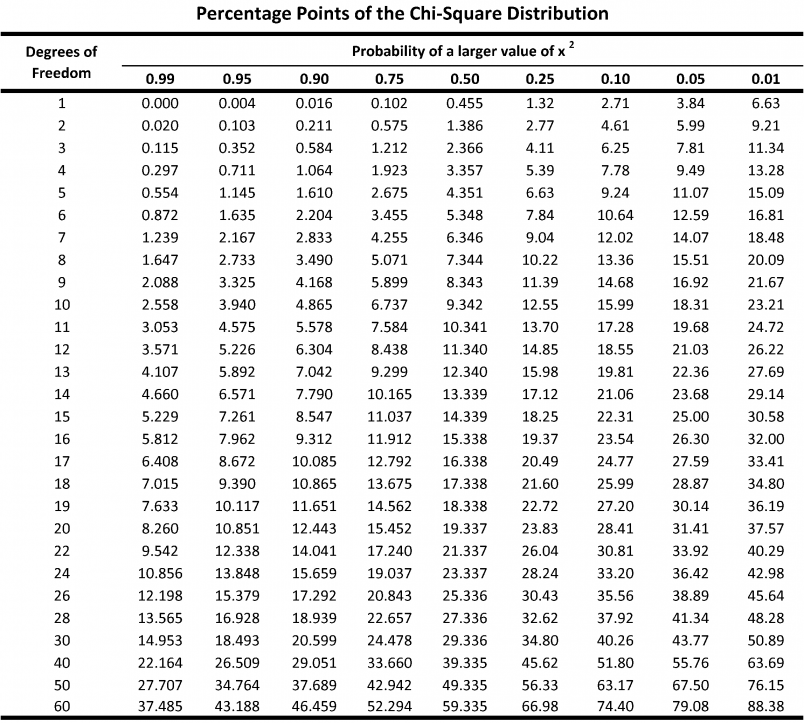